In [37]:

import importlib.util
import sys
from google.colab import drive

drive.mount('/content/gdrive')

# To add a directory with your code into a list of directories 
# which will be searched for packages


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
sys.path.append('/content/gdrive/My Drive/hw2/code/')
import data_loader


In [0]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import transforms
from torch.nn import functional as F
import torch.optim as optim
import torch.utils.data as data_utils
from data_loader import get_dataset
import torch.optim as optim
from torch.optim import Adam, SGD, LBFGS
import numpy as np

In [0]:
batch_size = 256
num_epochs = 1000
max_iters  = 1000
print_iter = 25 # Prints results every n iterations
conv_shapes = [[1,64,128]] #


# Model parameters
input_dim = 128
embed_dim = 64
num_labels = 26
cuda = torch.cuda.is_available()

In [121]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [0]:
from torchvision import models   
model = models.resnet50(pretrained=True).to(device)
for param in model.parameters():

  param.requires_grad = False   

In [0]:
model.fc = nn.Sequential(
               nn.Linear(2048,896),
               nn.ReLU(inplace=True),
               nn.Linear(896, 26)).to(device)


In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.fc.parameters()) 


In [0]:
#testing
def testing():
    finaltestletteracc =0 
    testpredictedletters,testactualletters=[],[]
    for i_batch, sample in enumerate(test_loader):
        if i_batch%25==0:
          print("Batch=", i_batch)
        test_X = sample[0]
        test_Y = sample[1]
#       print(len(test_X))

        lastflag = (len(test_X)<256)
        if lastflag:
          test_X= test_X.view(len(test_X),1,16,8)
          test_X= test_X.repeat(1,3,1,1)
          test_Y = test_Y.view(len(train_Y),26)
        else:
          test_X= test_X.view(256,1,16,8)
          test_X= test_X.repeat(1,3,1,1)
          test_Y = test_Y.view(256,26)
        
        
        if cuda:
            test_X = test_X.cuda()
            test_Y = test_Y.cuda()

        labels=  torch.max(test_Y, 1)[1]
        
        

        outputs = model(test_X)
        loss = criterion(outputs,labels)

        running_loss = 0.0
        running_corrects = 0
        _, preds = torch.max(outputs, 1)
        testactualletters.extend(labels.tolist())
        testpredictedletters.extend(preds.tolist())
        running_loss += loss.item() * test_X.size(0)
        running_corrects += torch.sum(preds == (labels.data))
        
        epoch_loss = running_loss / len(test_Y)
        epoch_acc = running_corrects.double() / len(test_Y)
        finaltestletteracc = finaltestletteracc + len(test_Y)*epoch_acc
        if i_batch%25==0:
          print("Letter accuracy =",epoch_acc)
    
    wtestingepoc.append(wordaccuracies(testpredictedletters,testactualletters))
    testingepoc.append(finaltestletteracc/len(test))
    print("Testing acc = :",finaltestletteracc/len(test) ) 


#word accuracies function
#gettinig data using DataLoader class , modified code
dataset = get_dataset()

#word accuracies function based on letters, required dataset.nextletter info
def wordaccuracies(pred,actual):
  incorrectwords = 0
  totalwords = 0
  flag = True

  for i in range(len(pred)):

    if pred[i] != actual[i]:
      flag= False
    if dataset.nextletter[split+i] == -1:
      if flag == False:
        incorrectwords+=1
        flag  = True
      totalwords = totalwords+1

  wordaccuracy = 1 - incorrectwords/totalwords
  print("Word accuracy: ", wordaccuracy)
  return wordaccuracy
  print("\n")



In [126]:
#get data
dataset = get_dataset()

trainingepoc,testingepoc=[],[]
wtrainingepoc,wtestingepoc=[],[]
#split data
split = int(0.5 * len(dataset.data)) # train-test split
train_data, test_data = dataset.data[:split], dataset.data[split:]
train_target, test_target = dataset.target[:split], dataset.target[split:]
    # Convert dataset into torch tensors
train = data_utils.TensorDataset(torch.tensor(train_data).float(), torch.tensor(train_target).long())
test = data_utils.TensorDataset(torch.tensor(test_data).float(), torch.tensor(test_target).long())

# Define train and test loaders
train_loader = data_utils.DataLoader(train,  # dataset to load from
                                         batch_size=batch_size,  # examples per batch (default: 1)
                                         shuffle=True,
                                         sampler=None,  # if a sampling method is specified, `shuffle` must be False
                                         num_workers=5,  # subprocesses to use for sampling
                                         pin_memory=False,  # whether to return an item pinned to GPU
                                         )

test_loader = data_utils.DataLoader(test,  # dataset to load from
                                        batch_size=batch_size,  # examples per batch (default: 1)
                                        shuffle=False,
                                        sampler=None,  # if a sampling method is specified, `shuffle` must be False
                                        num_workers=5,  # subprocesses to use for sampling
                                        pin_memory=False,  # whether to return an item pinned to GPU
                                        )


for i in range(20):
    finaltrainletteracc= 0
    trainpredictedletters,trainactualletters=[],[]
    print("\n  Processing epoch {}".format(i))
    
 #   print('Loaded dataset... ')

    # Now start training
    for i_batch, sample in enumerate(train_loader):
        
        if i_batch%25==0:
          print("Batch=", i_batch)
        train_X = sample[0]
        train_Y = sample[1]

        lastflag = (len(train_X)<256)
        if lastflag:
          train_X= train_X.view(len(train_X),1,16,8)
          train_X= train_X.repeat(1,3,1,1)
          train_Y = train_Y.view(len(train_Y),26)
        else:
          train_X= train_X.view(256,1,16,8)
          train_X= train_X.repeat(1,3,1,1)
          train_Y = train_Y.view(256,26)
        
        if cuda:
            train_X = train_X.cuda()
            train_Y = train_Y.cuda()
        
        labels=  torch.max(train_Y, 1)[1]

        
        
        optimizer.zero_grad()
        outputs = model(train_X)         
        loss = criterion(outputs,labels)
        loss.backward()

        #outputs = model(train_X)
        #loss = criterion(outputs, labels)

        running_loss = 0.0
        running_corrects = 0

        optimizer.step()
        _, preds = torch.max(outputs, 1)
        
        
        trainactualletters.extend(labels.tolist())
        trainpredictedletters.extend(preds.tolist())

        running_loss += loss.item() * train_X.size(0)
        running_corrects += torch.sum(preds == (labels).data)

        epoch_loss = running_loss / len(train_Y)
        epoch_acc = running_corrects.double() / len(train_Y)

        if i_batch%25==0:
          print("Letter accuracy =",epoch_acc)
        finaltrainletteracc = finaltrainletteracc + len(train_X)*epoch_acc
    
    wtrainingepoc.append(wordaccuracies(trainpredictedletters,trainactualletters))
    trainingepoc.append(finaltrainletteracc/len(train))
    print("Training acc = :",finaltrainletteracc/len(train) )
    testing()

    


  Processing epoch 0
Batch= 0
Letter accuracy = tensor(0.0742, device='cuda:0', dtype=torch.float64)
Batch= 25
Letter accuracy = tensor(0.3203, device='cuda:0', dtype=torch.float64)
Batch= 50
Letter accuracy = tensor(0.4062, device='cuda:0', dtype=torch.float64)
Batch= 75
Letter accuracy = tensor(0.4570, device='cuda:0', dtype=torch.float64)
Batch= 100
Letter accuracy = tensor(0.4609, device='cuda:0', dtype=torch.float64)
Word accuracy:  0.0739559164733179
Training acc = : tensor(0.3579, device='cuda:0', dtype=torch.float64)
Batch= 0
Letter accuracy = tensor(0.4180, device='cuda:0', dtype=torch.float64)
Batch= 25
Letter accuracy = tensor(0.4141, device='cuda:0', dtype=torch.float64)
Batch= 50
Letter accuracy = tensor(0.4492, device='cuda:0', dtype=torch.float64)
Batch= 75
Letter accuracy = tensor(0.4453, device='cuda:0', dtype=torch.float64)
Batch= 100
Letter accuracy = tensor(0.4688, device='cuda:0', dtype=torch.float64)
Word accuracy:  0.07453596287703013
Testing acc = : tensor(0.42

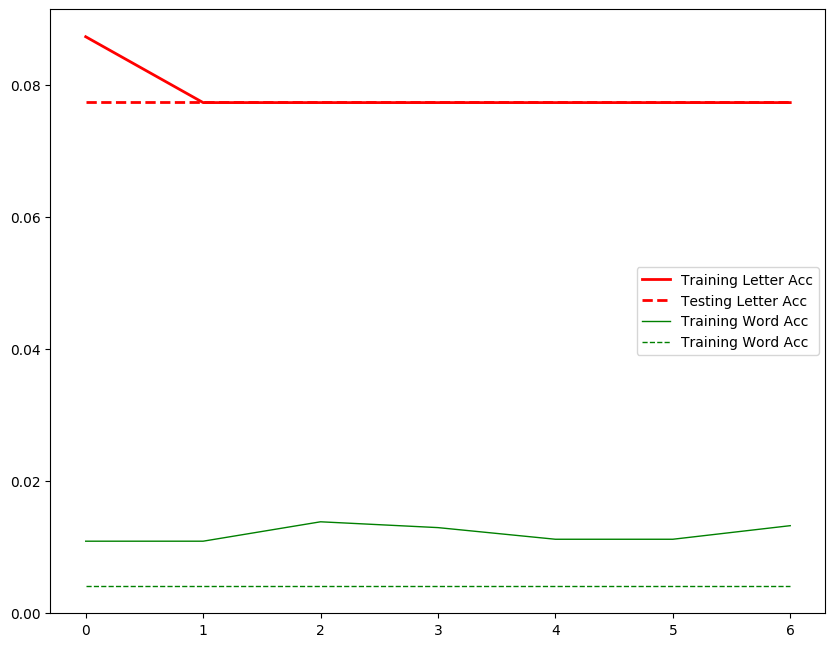

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
x= [x for x in range(7)]
y1 = trainingepoc
y2 = testingepoc
y3 = wtrainingepoc
y4 = wtestingepoc

w = 10
h = 8
d = 100
plt.figure(figsize=(w, h), dpi=d)

plt.plot(x, y1, color='red', linewidth=2,  label="Training Letter Acc")
plt.plot(x, y2, color='red', linewidth=2,linestyle='dashed',   label="Testing Letter Acc")
plt.plot(x, y3, color='green', linewidth=1, label="Training Word Acc")
plt.plot(x, y4, color='green', linewidth=1,linestyle='dashed',  label="Training Word Acc")
plt.legend()

plt.savefig("accuracies.png")

In [131]:
max(testingepoc)

tensor(0.5500, device='cuda:0', dtype=torch.float64)